Для датасета Boston сделать лучшую линейную модель, которую можно легко интерпретировать. Сделать выводы о данных на основе вашей линейной регрессии.

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

data = load_boston()

C:\Users\judav\anaconda3\envs\ds-online-course\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Califo

In [55]:
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [56]:
x_df = pd.DataFrame(data['data'], columns=data['feature_names'])
y_df = pd.DataFrame(data['target'], columns=['y'])

In [57]:
#данные 
x_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [58]:
#предсказание стоимости
y_df

,y
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [59]:
full_df = pd.concat([x_df, y_df], axis=1)


Проверяю какие признаки имеют высокую корреляцию с target. Это LSTAT и RM
Проверка на мультиколлинеарность. RAD, TAX имеют соотношение 0.91. А также DIS c INDUS, NOX, AGE - имеют сильные взаимосвязи. 
Поэтому все признаки не могут быть использованы для обучения модели.
Выбираю  LSTAT и RM.

<AxesSubplot: >

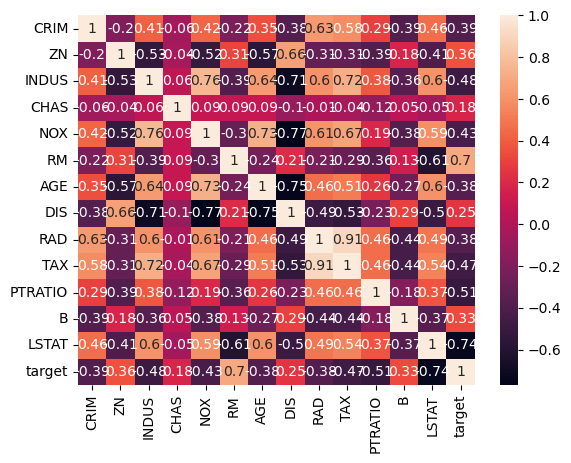

In [60]:
cor_df = x_df
cor_df['target'] = data['target']
correlation_matrix = cor_df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

Разделение выборки на ОБУЧАЮЩУЮ и ТЕСТОВУЮ

In [61]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, train_size=0.8, random_state=0)

In [62]:
#обучаем модель по двум переменным
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model1 = LinearRegression()
x_train[['LSTAT','RM']]
#x_train
model1.fit(x_train[['LSTAT','RM']], y_train)
y_pred = model1.predict(x_test[['LSTAT','RM']])
mean_squared_error(y_pred, y_test)

37.38310563877996

В модуле 10 было замечено что зависимость таргета от LSTAT похожа на параболу и нужно учитывать квадратичные зависимости

In [63]:
# Обновим x_train, x_test
x_train['LSTAT^2'] = x_train['LSTAT'] ** 2
x_test['LSTAT^2'] = x_test['LSTAT'] ** 2
# Сделаем новую модель
model2 = LinearRegression()
# Обучаемся уже на трех колонках
model2.fit(x_train[['LSTAT', 'LSTAT^2', 'RM']], y_train)
# Выведем общую ошибку на тестовой выборке
y_pred = model2.predict(x_test[['LSTAT', 'LSTAT^2', 'RM']])
print(mean_squared_error(y_pred, y_test))

32.71483821899669


Ошибка уменьшилась.
Проанализируем нет ли квадратичной зависимости таргета от RM 

39.7947311637265


C:\Users\judav\anaconda3\envs\ds-online-course\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


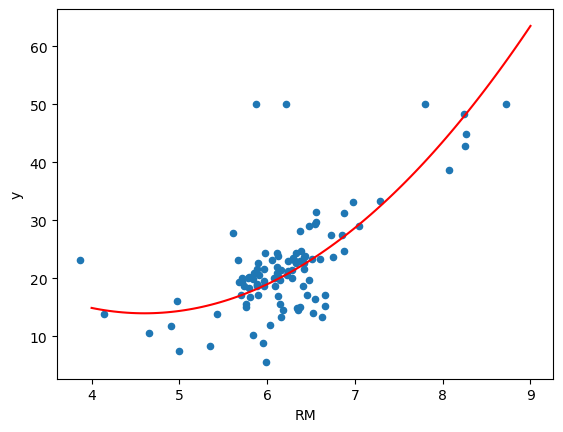

In [64]:
# Обновим x_train, x_test
x_train['RM^2'] = x_train['RM'] ** 2
x_test['RM^2'] = x_test['RM'] ** 2
# Сделаем новую модель
model3 = LinearRegression()
# Обучаемся на двух колонках
model3.fit(x_train[['RM', 'RM^2']], y_train)
# Выведем общую ошибку на тестовой выборке
y_pred = square_model.predict(x_test[['RM', 'RM^2']])
print(mean_squared_error(y_pred, y_test))
x = np.linspace(4, 9, 100).reshape(-1, 1) # Делаем reshape, чтобы x стал матрицей с одним столбцом
x_square = x ** 2
x = np.hstack([x, x_square])
y = model3.predict(x)
full_df = pd.concat([x_df, y_df], axis=1)
full_df.loc[x_test.index].plot(kind='scatter', x='RM', y='y')
plt.plot(x[:, 0], y, color='r')

Вывод: нужно учитывть квадратичную зависимость таргета от RM и LSTAT

In [65]:
#обучаем модель 
model4 = LinearRegression()
model4.fit(x_train[['LSTAT','LSTAT^2','RM','RM^2']], y_train)
y_pred = model4.predict(x_test[['LSTAT','LSTAT^2','RM','RM^2']])
mean_squared_error(y_pred, y_test)

27.652092003279098

In [ ]:
Точность модели = 27.65